In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\Diabetes\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.shape

(768, 9)

In [18]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [19]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [127]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [123]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [124]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

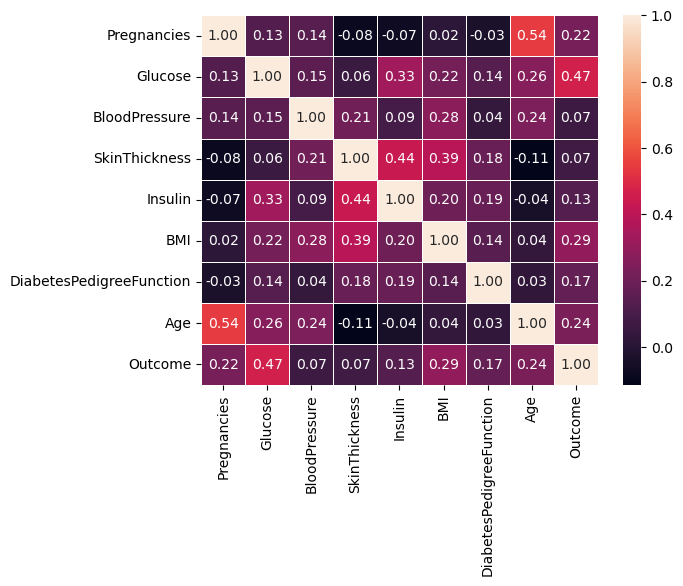

In [30]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=.6)

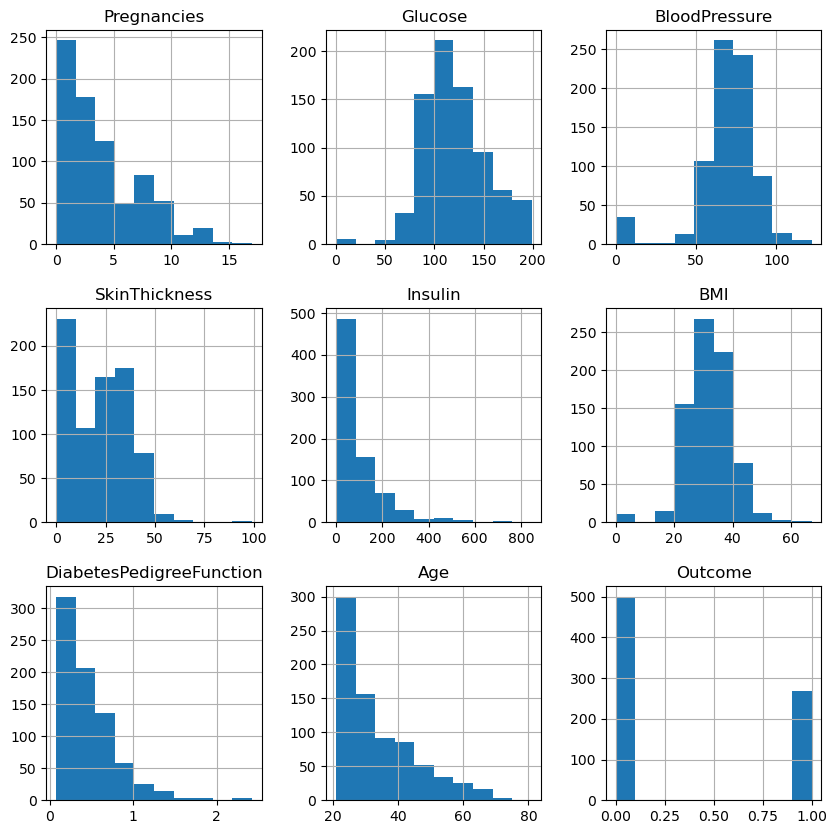

In [31]:
df.hist(figsize=(10,10));


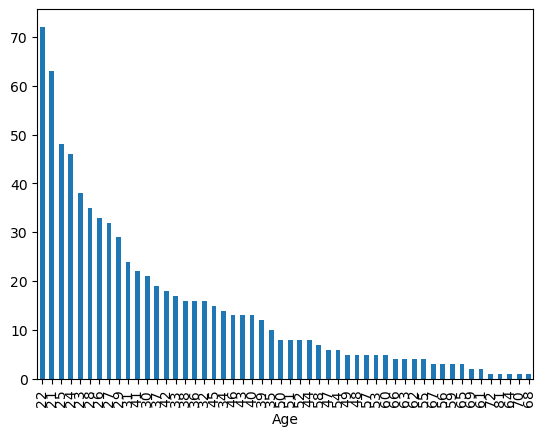

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df.Age.value_counts().plot(kind='bar');


<Axes: xlabel='Pregnancies'>

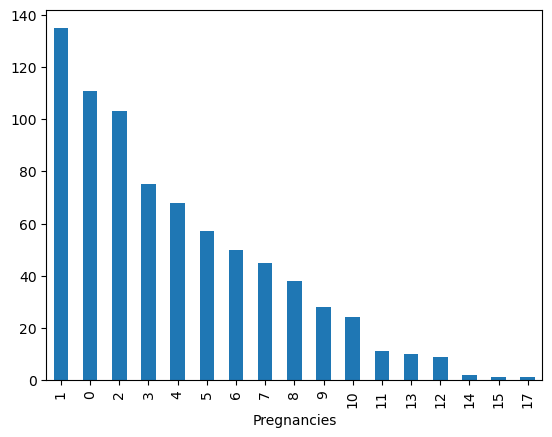

In [57]:
df['Pregnancies'].value_counts().plot(kind='bar')

<Axes: xlabel='Outcome'>

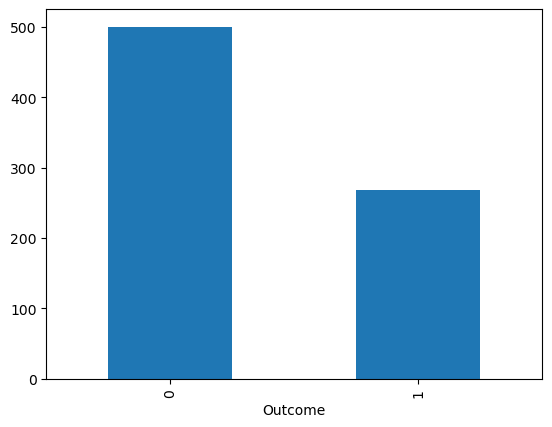

In [58]:
df['Outcome'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

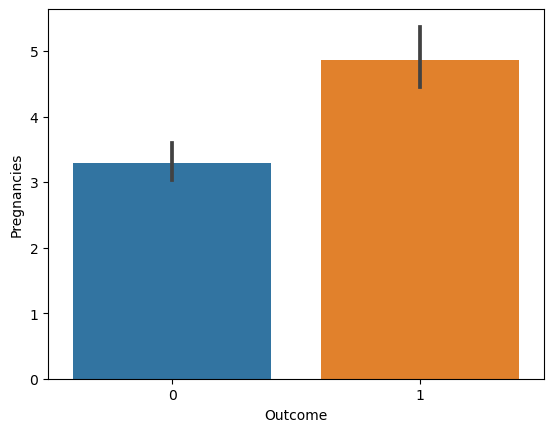

In [61]:
sns.barplot(x = 'Outcome', y= 'Pregnancies', data = df)

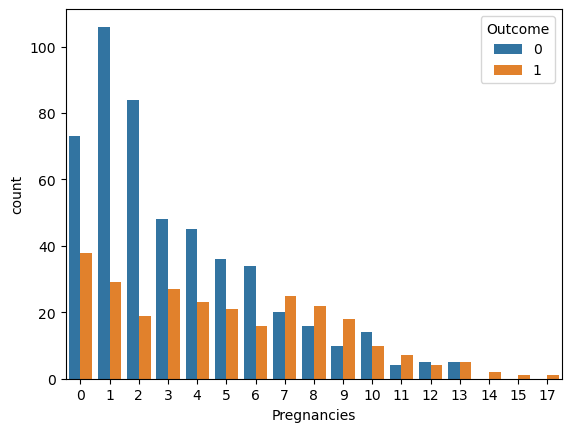

In [72]:

sns.countplot(x="Pregnancies",hue="Outcome", data=df);

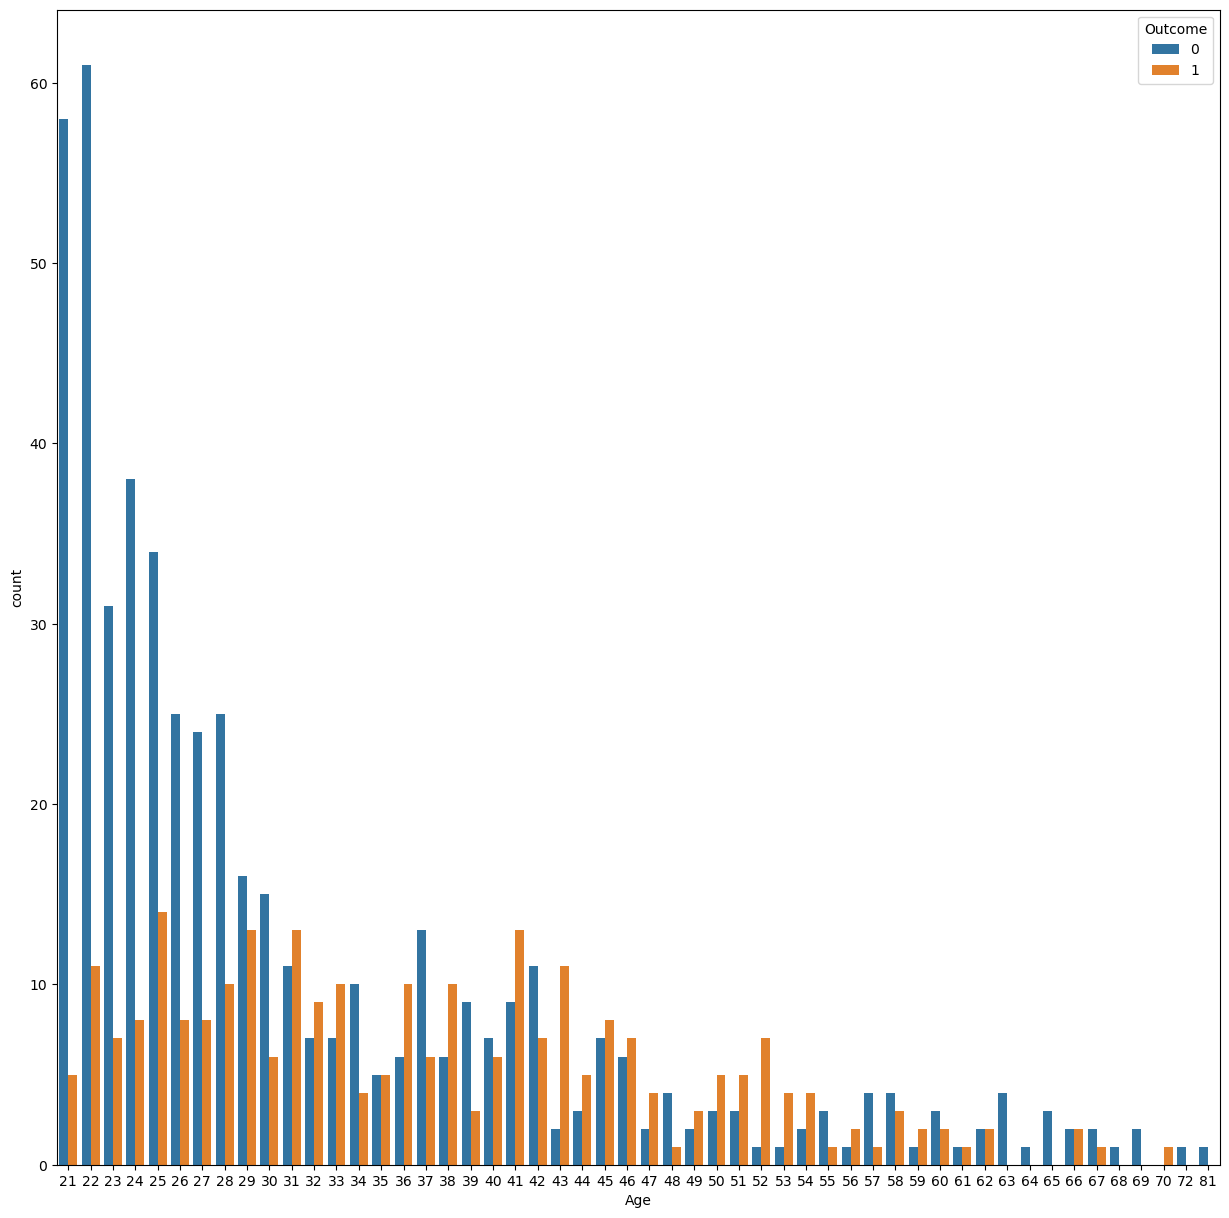

In [78]:
plt.figure(figsize=(15,15))
sns.countplot(x="Age",hue="Outcome", data=df);

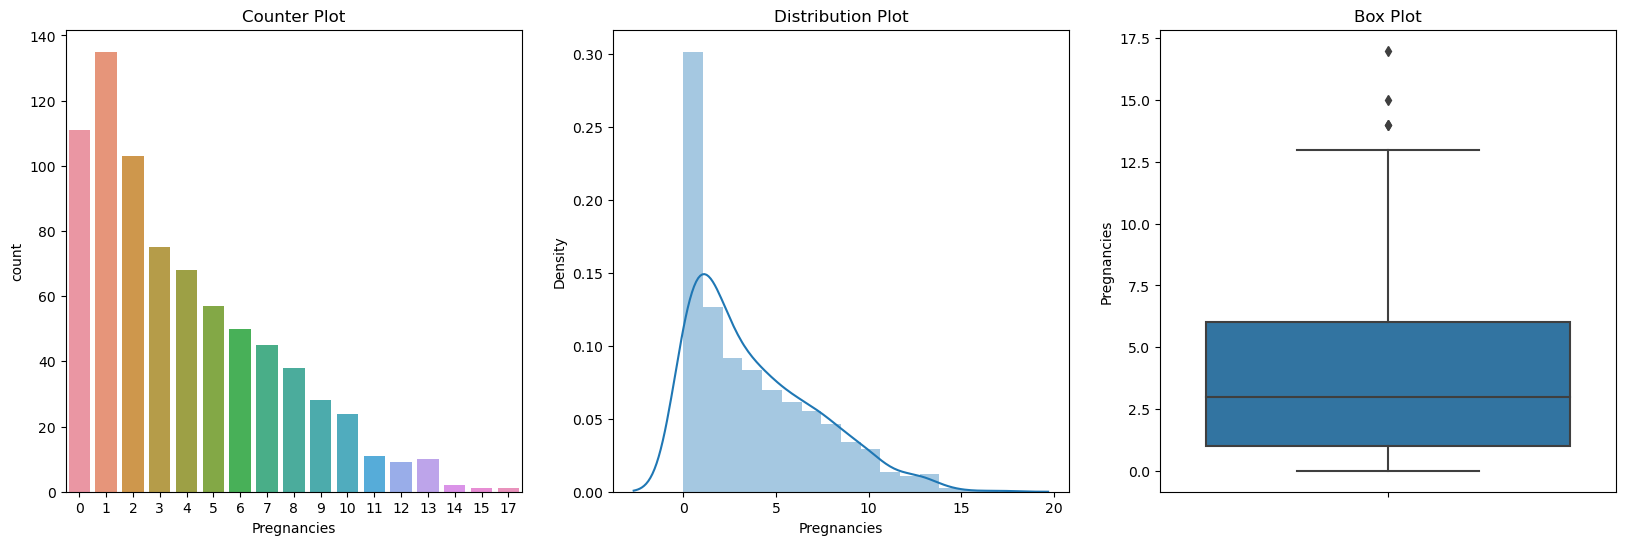

In [86]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies',data=df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df["Pregnancies"])

plt.show()

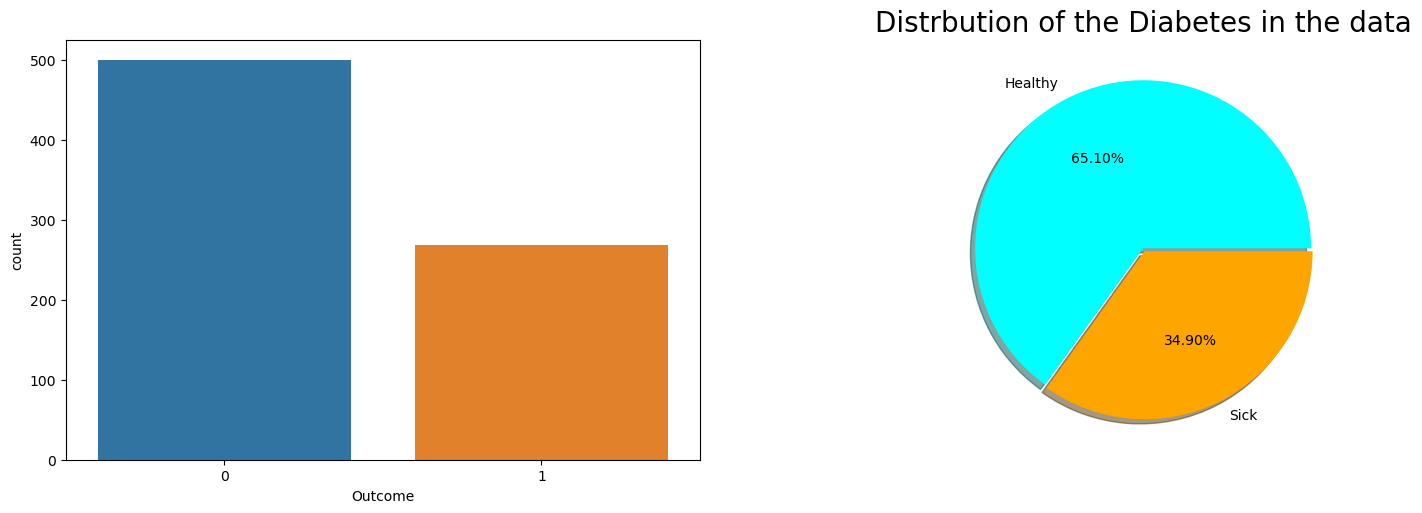

In [87]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outcome', data=df)

plt.subplot(2,2,2)
no_dib = df[df.Outcome == 0].count()[0]
dib = df[df.Outcome == 1].count()[0]
plt.title('Distrbution of the Diabetes in the data', {'fontsize' : 20})
plt.pie([no_dib, dib], labels=['Healthy', 'Sick'], autopct="%.2f%%", explode=[0.01,0.01], colors=['cyan', 'orange'], shadow=True)
plt.show()

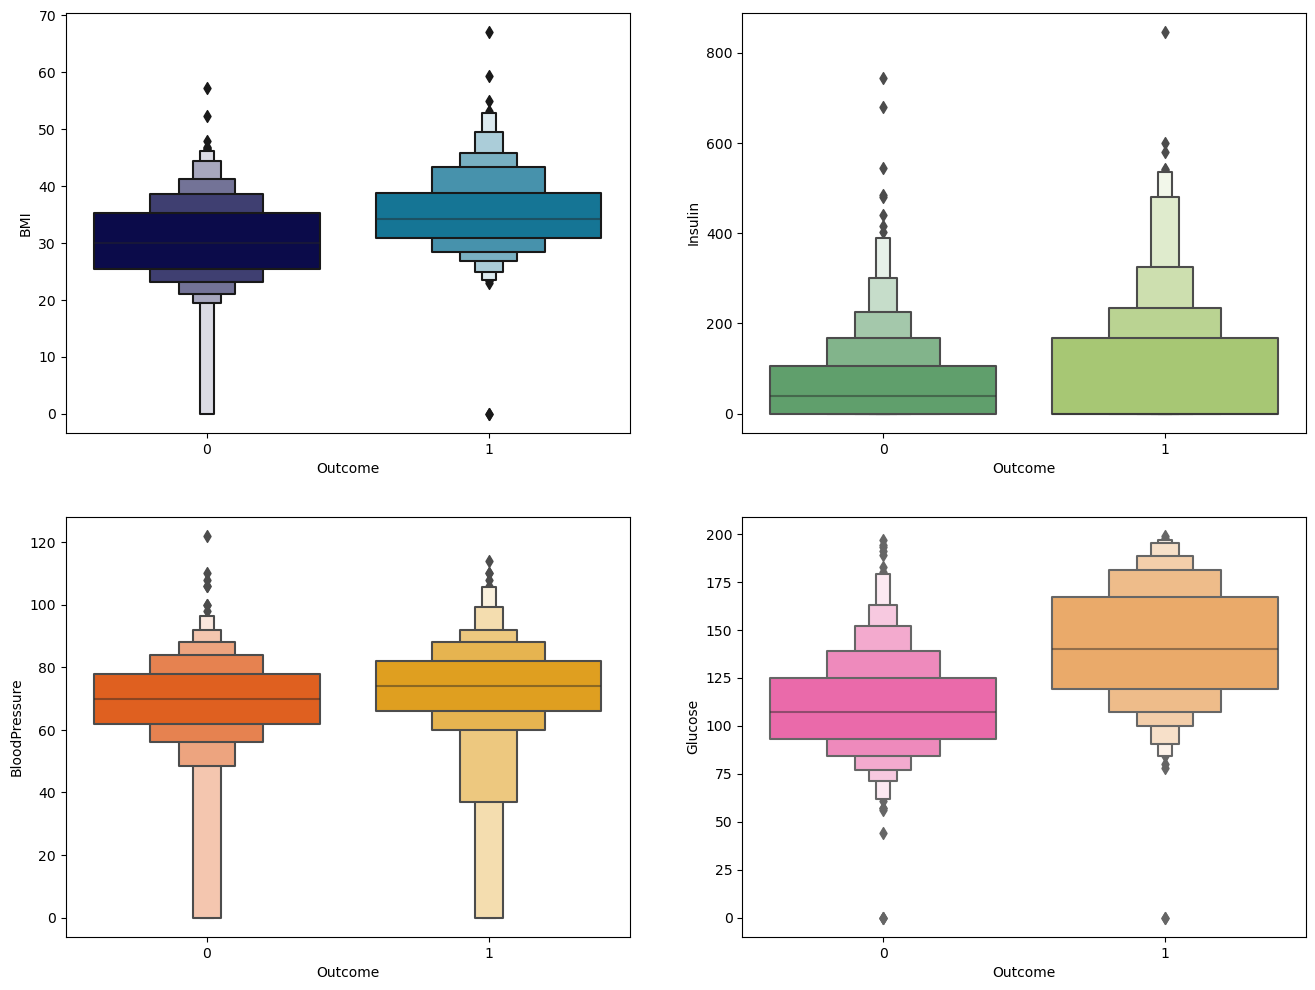

In [88]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.boxenplot(x='Outcome', y='BMI', data=df, palette='ocean')

plt.subplot(2,2,2)
sns.boxenplot(x='Outcome', y='Insulin', data=df, palette='summer')

plt.subplot(2,2,3)
sns.boxenplot(x='Outcome', y='BloodPressure', data=df, palette='autumn')

plt.subplot(2,2,4)
sns.boxenplot(x='Outcome', y='Glucose', data=df, palette='spring');

<Axes: >

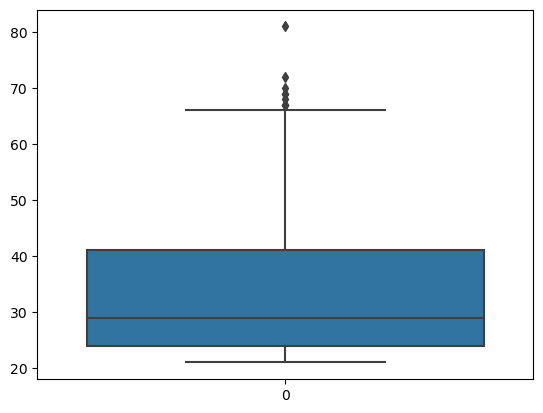

In [28]:
sns.boxplot(df.Age)

# Modeling

In [91]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, stratify = y)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((545, 8), (223, 8), (545,), (223,))

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# svm

In [53]:
model_sv = SVC(kernel = 'linear')

In [70]:
model_sv.fit(X_train, y_train)

SVC(kernel='linear')

In [55]:
y_pred = model_sv.predict(X_test)

In [71]:
model_sv.score(X_train,y_train)

0.7651376146788991

In [72]:
model_sv.score(X_test,y_test)

0.8026905829596412

# Randon Forest

In [196]:
model_rf= RandomForestClassifier(n_estimators=188)

In [200]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=188)

In [198]:
model_rf.score(X_train,y_train)

1.0

In [201]:
model_rf.score(X_test,y_test)

0.7982062780269058

# xgboost

In [133]:
model_xg = xgb.XGBClassifier(objective='multi:softmax', num_class=40)

In [134]:
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=40,
              num_parallel_tree=None, ...)

In [120]:
model_xg.score(X_train ,y_train )

1.0

In [135]:
model_xg.score(X_test ,y_test )

0.7314814814814815